# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [2]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create validation set (last 10,000 images)
validation_images = train_and_validation_images[-10000:]
validation_labels = train_and_validation_labels[-10000:]

# Create training set (first 50,000 images)
train_images = train_and_validation_images[:50000]
train_labels = train_and_validation_labels[:50000]

In [4]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

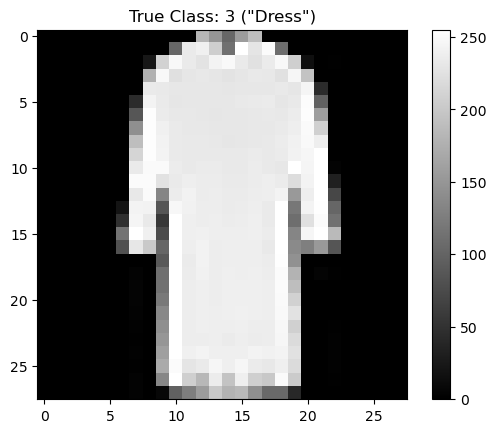

In [5]:
# Plot one random image with a label
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title(f'True Class: {numerical_label} ("{text_description}")')
plt.gca().grid(False)

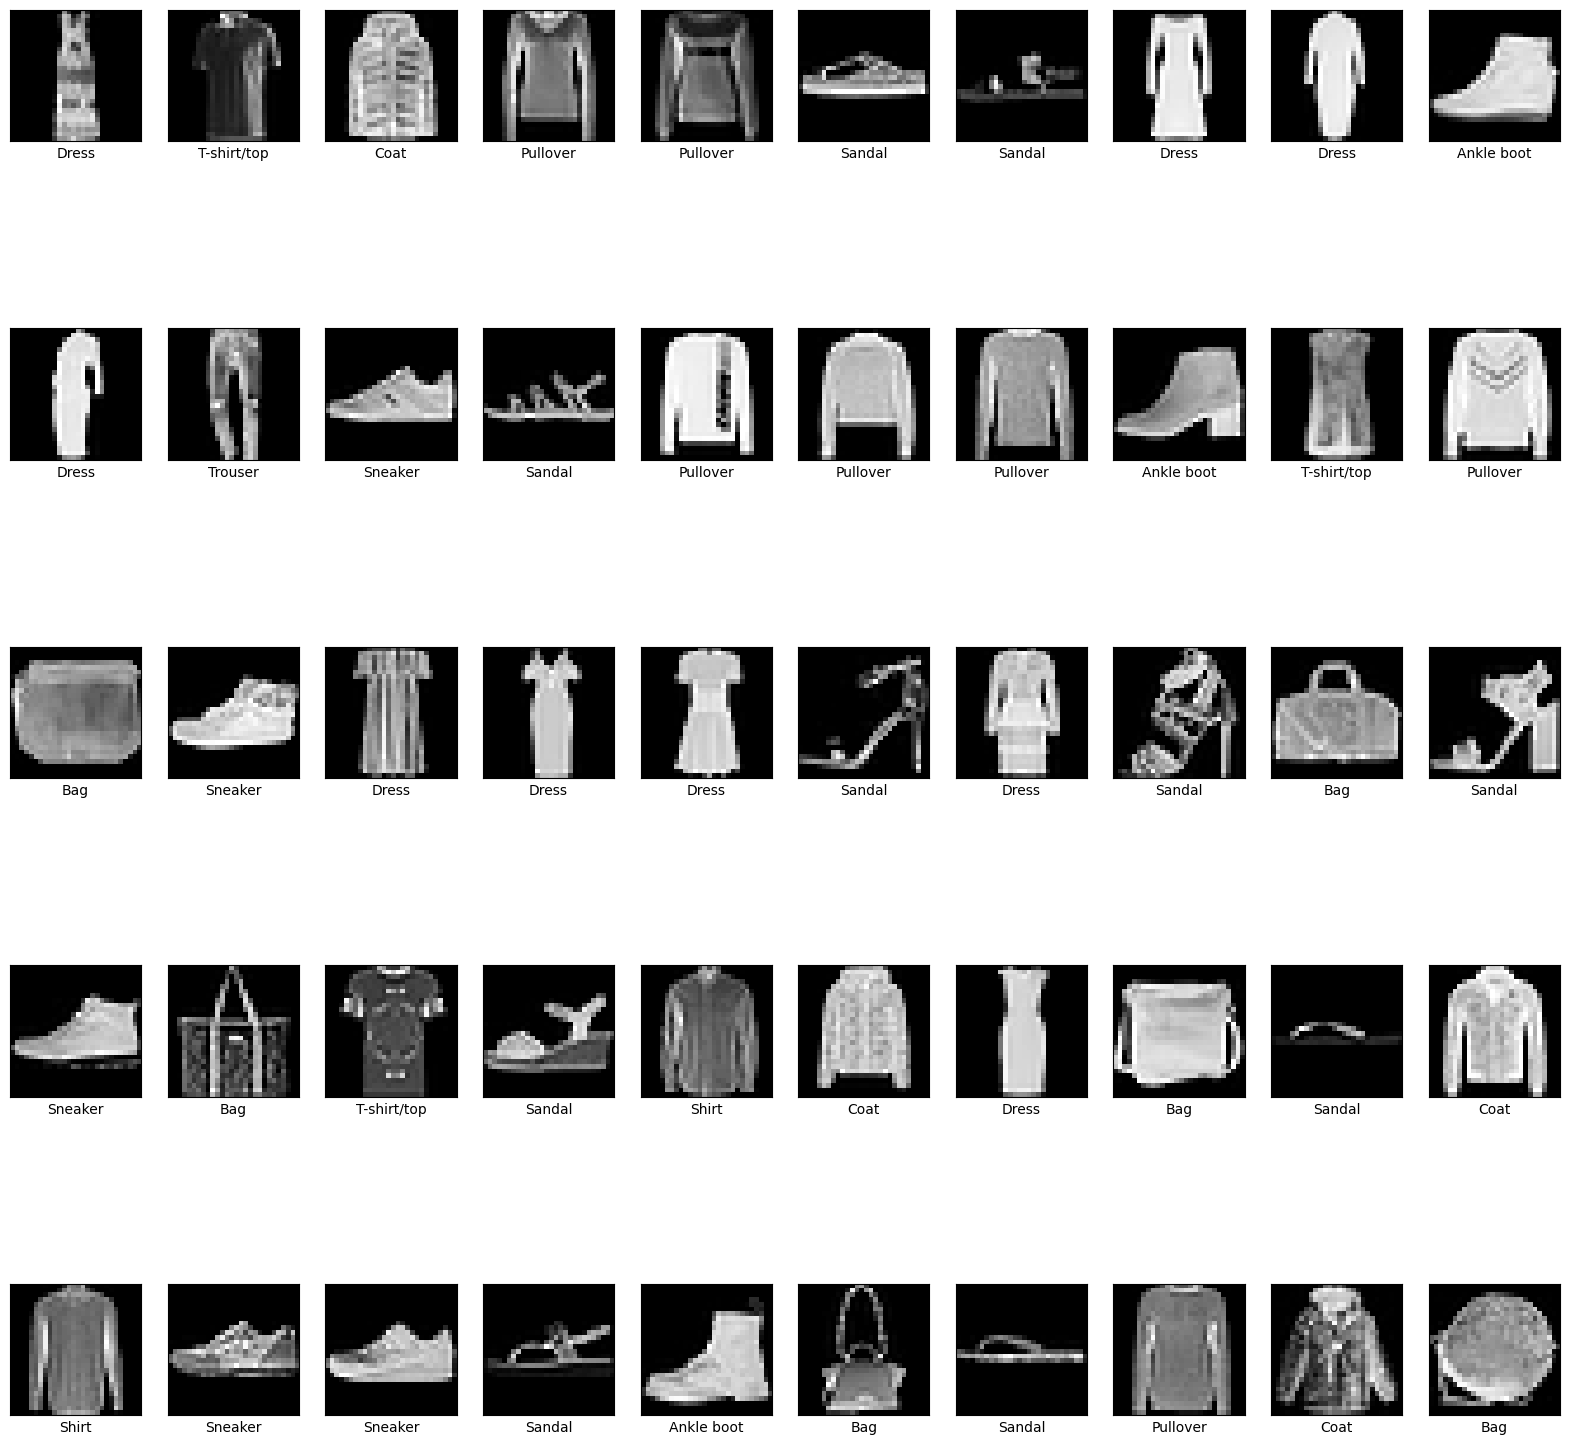

In [6]:
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])


# Preprocess

In [7]:
# Flatten images
train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)


In [8]:
# Normalize pixel values
train_images_model = train_images_flatten / 255.
validation_images_model = validation_images_flatten / 255.
test_images_model = test_images_flatten / 255.

In [11]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, num_classes=10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, num_classes=10)
test_labels_categ = keras.utils.to_categorical(test_labels, num_classes=10)


# Train

In [13]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 

model = Sequential()

# Add input layer (784 nodes) and hidden layer (512 nodes)
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# Add output layer (10 nodes, one for each class)
model.add(Dense(10, activation='softmax'))

# End Code

c:\Users\HARDEY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images_model, train_labels_categ,
                    batch_size=128,
                    epochs=40,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.7291 - loss: 0.7919 - val_accuracy: 0.8484 - val_loss: 0.4278
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8471 - loss: 0.4194 - val_accuracy: 0.8532 - val_loss: 0.4124
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8669 - loss: 0.3661 - val_accuracy: 0.8597 - val_loss: 0.3856
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8697 - loss: 0.3497 - val_accuracy: 0.8593 - val_loss: 0.3806
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8792 - loss: 0.3238 - val_accuracy: 0.8741 - val_loss: 0.3520
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8862 - loss: 0.3045 - val_accuracy: 0.8661 - val_loss: 0.3714
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8922 - loss: 0.2944 - val_accuracy: 0.8794 - val_loss: 0.3347
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8954 - loss: 0.2850 - val_ac

# Test

In [15]:
# Evaluate model on the test set
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8884000182151794


In [16]:
test_logits = model.predict(test_images_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [17]:
test_logits

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_predictions = np.argmax(test_logits, axis=1)

In [19]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

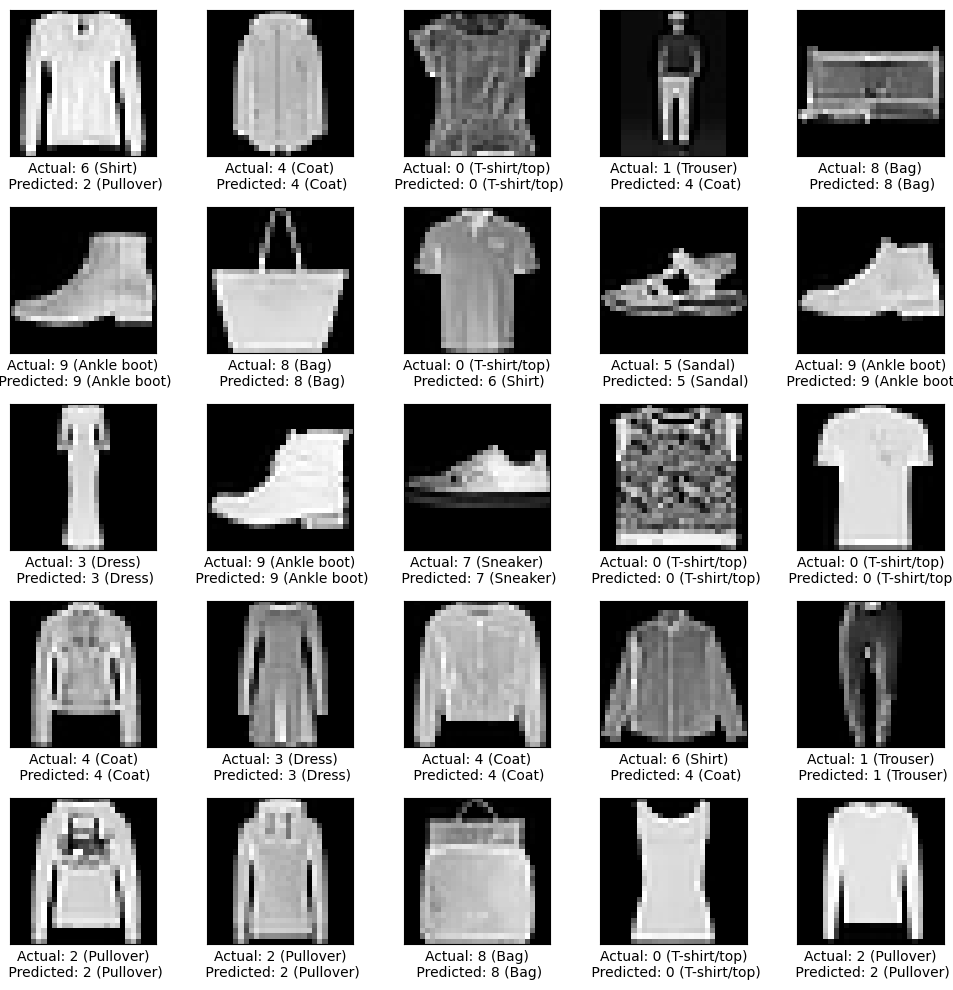

In [20]:
# Plot some predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    actual_label = test_labels[img_index]
    predicted_label = test_predictions[img_index]
    
    plt.xlabel(f"Actual: {actual_label} ({text_labels[actual_label]})\n Predicted: {predicted_label} ({text_labels[predicted_label]})")
    
plt.tight_layout()
plt.show()
